In [2]:
%pip install pandas numpy scikit-learn matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 11.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset Shape: (1599, 12)

First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  


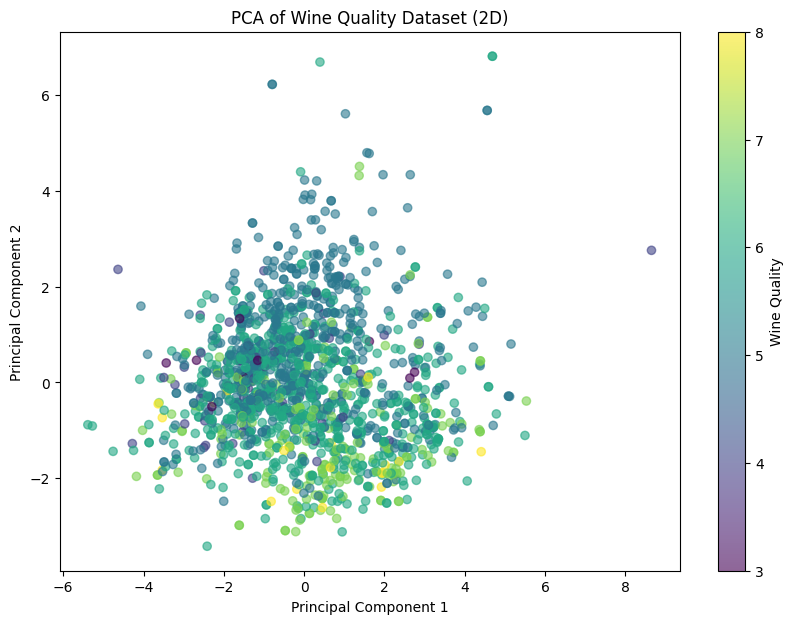

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('winequality-red.csv')  # Update path if needed

# Step 2: Explore the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nFeature Columns:\n", data.columns.tolist())
print("\nMissing Values:\n", data.isnull().sum())

# Step 3: Separate features and target
X = data.drop('quality', axis=1)  # Features (11 columns)
y = data['quality']  # Target (quality score)

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Step 6: Analyze PCA results
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# Step 7: Visualize PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Quality Dataset (2D)')
plt.show()


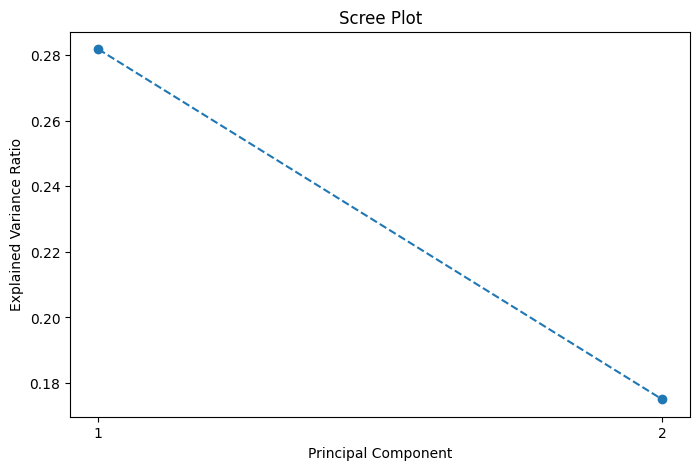

In [2]:
# Step 8: Scree plot (to see variance per component)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 3), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks([1, 2])
plt.show()


In [3]:
# Step 9: Train a classifier on PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassifier Accuracy with PCA Features:", accuracy)


Classifier Accuracy with PCA Features: 0.5375


In [4]:
# Step 10: Compare with original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = clf_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print("Classifier Accuracy with Original Features:", accuracy_orig)

Classifier Accuracy with Original Features: 0.65


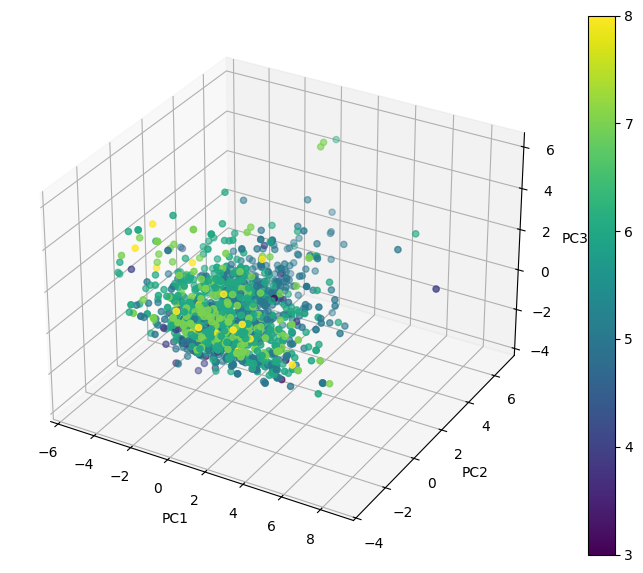

In [5]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()